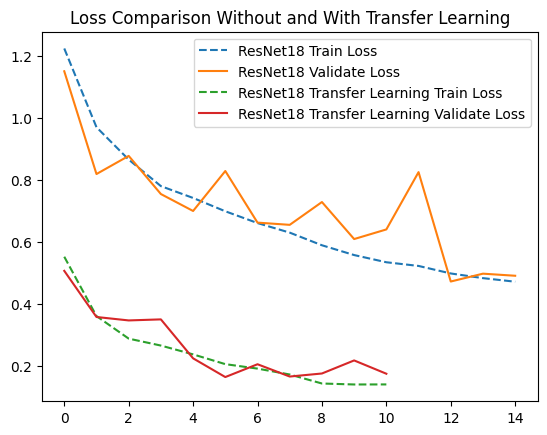

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataset2_metrics = np.load('resnet_dataset_2_metrics.npz')
tl_dataset2_metrics = np.load('resnet_transfer_learning_dataset_2_metrics_tl.npz')

dataset2_train_loses = dataset2_metrics['train_losses']
dataset2_validate_loses = dataset2_metrics['validate_losses']

tl_dataset2_train_loses = tl_dataset2_metrics['train_losses']
tl_dataset2_validate_loses = tl_dataset2_metrics['validate_losses']

plt.plot(dataset2_train_loses,label='ResNet18 Train Loss', linestyle='dashed')
plt.plot(dataset2_validate_loses,label='ResNet18 Validate Loss')
plt.plot(tl_dataset2_train_loses,label='ResNet18 Transfer Learning Train Loss', linestyle='dashed')
plt.plot(tl_dataset2_validate_loses,label='ResNet18 Transfer Learning Validate Loss')
plt.title('Loss Comparison Without and With Transfer Learning')
plt.legend()
plt.show()

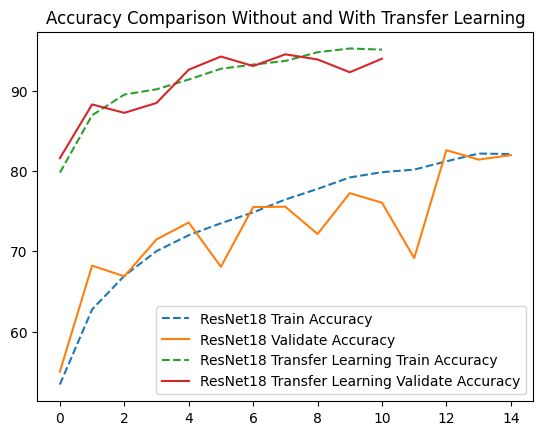

In [2]:
dataset2_train_accuracies = dataset2_metrics['train_accuracies']
dataset2_validate_accuracies = dataset2_metrics['validate_accuracies']

tl_dataset2_train_accuracies = tl_dataset2_metrics['train_accuracies']
tl_dataset2_validate_accuracies = tl_dataset2_metrics['validate_accuracies']

plt.plot(dataset2_train_accuracies,label='ResNet18 Train Accuracy', linestyle='dashed')
plt.plot(dataset2_validate_accuracies,label='ResNet18 Validate Accuracy')
plt.plot(tl_dataset2_train_accuracies,label='ResNet18 Transfer Learning Train Accuracy', linestyle='dashed')
plt.plot(tl_dataset2_validate_accuracies,label='ResNet18 Transfer Learning Validate Accuracy')
plt.title('Accuracy Comparison Without and With Transfer Learning')
plt.legend()
plt.show()

In [5]:
import torch
from torch.autograd import profiler
from torchvision.models import mobilenet_v2, resnet18, vgg16
import torch.nn as nn

class ResNet18(nn.Module):
  def __init__(self, num_of_classes):
    super(ResNet18, self).__init__()
    self.model = resnet18(weights=None)
    features = self.model.fc.in_features
    self.model.fc = nn.Linear(features, num_of_classes)

  def forward(self, x):
    x = self.model(x)
    return x

def measure_flops(model, input_size):
    input_data = torch.randn(input_size)
    
    # Use PyTorch profiler to measure FLOPS
    with profiler.profile(profile_memory=False, record_shapes=False) as prof:
        _ = model(input_data)
    
    total_flops = 0
    for event in prof.function_events:
        if "aten::" in event.name:
            total_flops += event.counts.get("Flops", torch.tensor(0, dtype=torch.float64))
    
    return total_flops.item() / 1e9  # Convert to GFLOPS

# Usage example
input_size = (64, 3, 224, 224)
model = ResNet18(num_of_classes=3)
flops = measure_flops(model, input_size)
print("FLOPS for One Forward Pass:", flops, "GFLOPS")

STAGE:2024-04-20 20:31:52 7609:501123 ActivityProfilerController.cpp:314] Completed Stage: Warm Up
STAGE:2024-04-20 20:31:54 7609:501123 ActivityProfilerController.cpp:320] Completed Stage: Collection
STAGE:2024-04-20 20:31:54 7609:501123 ActivityProfilerController.cpp:324] Completed Stage: Post Processing


AttributeError: 'EventList' object has no attribute 'tensor_ops'